In [1]:
#Beschreibung: Dieses Programm wertet Finanznachrichten aus

In [2]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import nltk
import pandas as pd
import matplotlib_inline as plt

In [3]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shamsbabayeva/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [5]:
finviz_url = "https://finviz.com/quote.ashx?t="
ticker = "AMZN"
url = finviz_url + ticker

In [6]:
req = Request(url=url, headers={"user-agent": "my-app"})
response = urlopen(req)
soup = BeautifulSoup(response, "html")

In [8]:
# print(soup.prettify())

In [9]:
news = soup.find(id="news-table")

In [11]:
news = news.findAll("tr")

In [17]:
news_data = []

for index, n in enumerate(news):
    title = n.a.text
    timestamp = n.td.text.split(" ")
    if len(timestamp) == 1:
        time = timestamp[0]
    else:
        date = timestamp[0]
        time = timestamp[1]
    news_data.append([date, time, title])

In [19]:
#news_data

In [20]:
df = pd.DataFrame(news_data, columns = ["date", "time", "title"])
df

,date,time,title
0,Apr-01-22,09:41AM,Three U.S. House Democrats seek documents from...
1,Apr-01-22,09:38AM,"Amazon's NY union vote count continues, labor ..."
2,Apr-01-22,09:00AM,U.S. lawmakers open probe into Amazon labor pr...
3,Apr-01-22,08:30AM,Stock Split Watch: Is MercadoLibre Next?
4,Apr-01-22,08:16AM,"GameStop Flags Stock Split, Shares Surge"
...,...,...,...
95,Mar-29-22,07:00AM,Biden proposed a big funding increase for US a...
96,Mar-29-22,06:00AM,3 Amazon Mistakes I've Made That Cost Me Big-Time
97,Mar-29-22,05:56AM,Justice Department Supports Bill That Targets ...
98,Mar-29-22,04:28AM,Senate Passes China Competition Bill to Start ...


In [21]:
vader = SentimentIntensityAnalyzer()

In [24]:
# df["title"].apply(lambda x: vader.polarity_scores(x)

In [25]:
df["compound"] = df["title"].apply(lambda x: vader.polarity_scores(x)["compound"])
df

,date,time,title,compound
0,Apr-01-22,09:41AM,Three U.S. House Democrats seek documents from...,0.1779
1,Apr-01-22,09:38AM,"Amazon's NY union vote count continues, labor ...",0.0000
2,Apr-01-22,09:00AM,U.S. lawmakers open probe into Amazon labor pr...,0.1779
3,Apr-01-22,08:30AM,Stock Split Watch: Is MercadoLibre Next?,0.0000
4,Apr-01-22,08:16AM,"GameStop Flags Stock Split, Shares Surge",0.2960
...,...,...,...,...
95,Mar-29-22,07:00AM,Biden proposed a big funding increase for US a...,0.3182
96,Mar-29-22,06:00AM,3 Amazon Mistakes I've Made That Cost Me Big-Time,-0.2023
97,Mar-29-22,05:56AM,Justice Department Supports Bill That Targets ...,0.7650
98,Mar-29-22,04:28AM,Senate Passes China Competition Bill to Start ...,0.0000


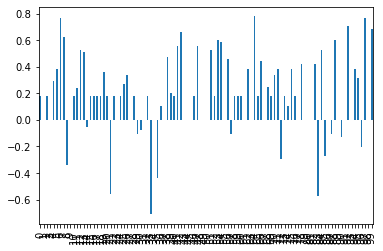

In [28]:
df["compound"].plot(kind="bar");

In [29]:
mean_df = df.groupby("date").mean()

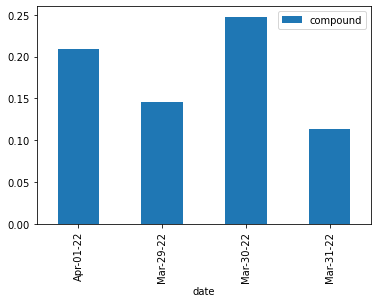

In [31]:
mean_df.plot(kind="bar");